Initial attempt at data processing for LDA
==
Loads a DESI image mzML file and processes it into binned bin x pixel numpy array

In [3]:
import numpy as np
import pylab as plt
import pymzml
%matplotlib inline

In [44]:
filename = '/Users/simon/Dropbox/MS_Ink_Data/Alphabet/abcdefgh_1.mzML'
run = pymzml.run.Reader(filename, MS1_Precision=5e-6)
nScans = run.getSpectrumCount()
print "Loaded {} scans".format(nScans)

Loaded 6327 scans


Define the mass bins (features) to use

In [46]:
minmz = 100
maxmz = 500
bins = np.arange(100,500,1)
binned_data = np.empty((len(bins),nScans),np.float)


In [47]:
sp = 0
for spectrum in run:
    for m,i in spectrum.peaks:
        mass_bin = int(np.floor(m))
        if mass_bin >= minmz and mass_bin < maxmz:
            binned_data[mass_bin-minmz][sp] += i
    sp += 1

Function to display an image for a particular bin index

In [86]:
def display_image(binned_data,bin_indices,nScans):
    n_rows = 8
    drop_perc = 1.25/(1.25+62)
    scans_per_line = nScans/n_rows
    nNonDrop = int(scans_per_line*(1-drop_perc))
    fwd = True
    pos = 0
    image_array = np.zeros((n_rows,nNonDrop),np.float)
    for row in range(n_rows):
        if fwd:
            for index in bin_indices:
                image_array[row,:] += binned_data[index,pos:pos+nNonDrop]
            pos += scans_per_line
            fwd = False
        else:
            for index in bin_indices:
                temp_line = binned_data[index,pos:pos+nNonDrop]
            image_array[row,:] = temp_line[::-1]
            pos += scans_per_line
            fwd = True
    plt.figure(figsize=(10,10))
    plt.imshow(image_array,aspect=10)

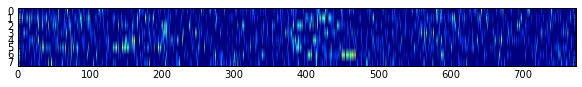

In [102]:
display_image(binned_data,[211],nScans)